In [1]:
!pip install ultralytics


  Using cached torch-2.8.0-cp313-cp313-manylinux_2_28_x86_64.whl.metadata (30 kB)
  Using cached torchvision-0.23.0-cp313-cp313-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached filelock-3.19.1-py3-none-any.whl.metadata (2.1 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached fsspec-2025.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.8.93-py3-none-manylinux2010_x86_64.manylinux_2_12_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_runtime_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_cupti_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cudnn_cu12-9.10.2.21-py3-none-manylinux_2_27_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_cublas_cu12-12.8.4.1-py3-none-manylinux_2_27_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cufft_cu12-11.3.3.83-py3-none-manylinux2014_x86_64.manylinu

In [2]:
!yolo check

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/omar/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.205 🚀 Python-3.13.5 torch-2.8.0+cu128 CPU (Intel Core i7-10750H 2.60GHz)
Setup complete ✅ (12 CPUs, 15.4 GB RAM, 70.4/101.5 GB disk)

OS                     Linux-6.8.0-85-generic-x86_64-with-glibc2.35
Environment            Linux
Python                 3.13.5
Install                git
Path                   /home/omar/Desktop/object-detection-video/object_detection_project/.venv/lib/python3.13/site-packages/ultralytics
RAM                    15.44 GB
Disk                   70.4/101.5 GB
CPU                    Intel Core i7-10750H 2.60GHz
CPU count              12
GPU                    None
GPU count              None
CUDA                   None

numpy      

In [4]:
import os
from ultralytics import YOLO

# Ensure models directory exists
MODEL_DIR = os.path.join("..", "models")
os.makedirs(MODEL_DIR, exist_ok=True)

# Download and save yolov8s.pt to models folder
model_path = os.path.join(MODEL_DIR, "yolov8s.pt")
model = YOLO("yolov8s.pt")
model.save(model_path)  # Save the model weights to the desired path


image 1/1 /home/omar/Downloads/media_173d13651460eb7e12c0ef4cf8410e0960a20f0ee.jpg: 448x640 1 person, 1 cup, 2 chairs, 1 dining table, 1 laptop, 162.4ms
Speed: 3.7ms preprocess, 162.4ms inference, 2.8ms postprocess per image at shape (1, 3, 448, 640)


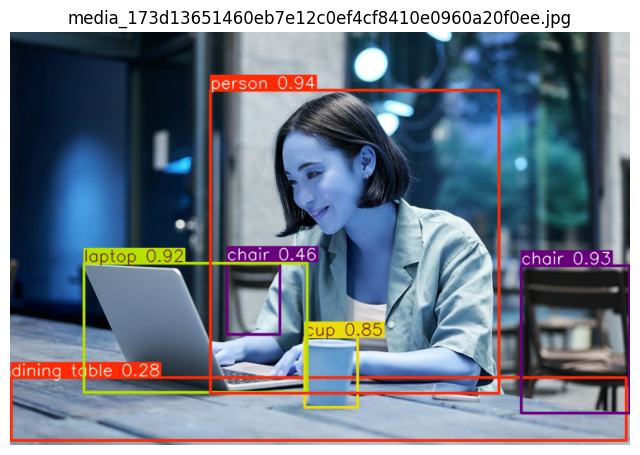

In [8]:
import matplotlib.pyplot as plt
import os
from ultralytics import YOLO

# Load the trained model
model_path = os.path.join("..", "models", "yolov8s.pt")
model = YOLO(model_path)

# Path to your test image
test_image = "/home/omar/Downloads/media_173d13651460eb7e12c0ef4cf8410e0960a20f0ee.jpg"

# Run inference and visualize results
results = model(test_image)
result_img = results[0].plot()

plt.figure(figsize=(8, 6))
plt.imshow(result_img)
plt.axis("off")
plt.title(os.path.basename(test_image))
plt.show()

In [2]:
import cv2
import os
from ultralytics import YOLO

# Load the model (uses CUDA if available)
model_path = os.path.join("..", "models", "yolov8s.pt")
model = YOLO(model_path)

# Path to your video
video_path = "/home/omar/Downloads/Video of object detection test.mp4"

# Open video file
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run inference (automatically uses CUDA if available)
    results = model.predict(frame)

    # Draw results on frame
    result_frame = results[0].plot()

    # Show frame
    cv2.imshow("YOLOv8 Object Detection", result_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 384x640 12 persons, 1 bicycle, 5 cars, 2 backpacks, 139.8ms
Speed: 1.4ms preprocess, 139.8ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 13 persons, 1 bicycle, 5 cars, 1 backpack, 121.5ms
Speed: 1.3ms preprocess, 121.5ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 1 bicycle, 5 cars, 1 backpack, 136.0ms
Speed: 1.9ms preprocess, 136.0ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 1 bicycle, 4 cars, 1 backpack, 133.1ms
Speed: 1.2ms preprocess, 133.1ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 persons, 1 bicycle, 4 cars, 2 backpacks, 132.2ms
Speed: 1.6ms preprocess, 132.2ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 1 bicycle, 4 cars, 1 traffic light, 142.6ms
Speed: 1.3ms preprocess, 142.6ms inference, 6.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 persons, 1 b

Only C and default locale supported with the posix collation implementation
Only C and default locale supported with the posix collation implementation
Case insensitive sorting unsupported in the posix collation implementation
Numeric mode unsupported in the posix collation implementation



0: 384x640 7 persons, 1 bicycle, 5 cars, 1 truck, 1 backpack, 286.4ms
Speed: 3.5ms preprocess, 286.4ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 persons, 1 bicycle, 4 cars, 1 truck, 1 backpack, 117.4ms
Speed: 2.0ms preprocess, 117.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 persons, 1 bicycle, 3 cars, 1 truck, 1 backpack, 121.8ms
Speed: 1.7ms preprocess, 121.8ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 persons, 1 bicycle, 3 cars, 1 truck, 1 backpack, 122.3ms
Speed: 1.6ms preprocess, 122.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 1 bicycle, 3 cars, 1 truck, 2 backpacks, 126.6ms
Speed: 1.5ms preprocess, 126.6ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 persons, 1 bicycle, 2 cars, 1 truck, 1 backpack, 139.4ms
Speed: 1.3ms preprocess, 139.4ms inference, 3.1ms postprocess per image at shape (1

In [1]:
import torch

# Check if CUDA is available
print("CUDA available:", torch.cuda.is_available())

# Check number of GPUs detected
print("Number of GPUs:", torch.cuda.device_count())

# Check GPU name
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))

# Check CUDA version PyTorch is using
print("CUDA Version (PyTorch):", torch.version.cuda)


CUDA available: False
Number of GPUs: 0
CUDA Version (PyTorch): 12.8


/home/omar/Desktop/object-detection-video/object_detection_project/.venv/lib/python3.13/site-packages/torch/cuda/__init__.py:829: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
